In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

## Data import 및 확인

In [2]:
df = pd.read_csv("five_minute/한국전력거래소_5분단위 전력수급현황_20230430.csv", encoding='cp949', index_col='기준일시', parse_dates=True)
df
# 종속변수는 현재수요(MW)로 설정한다.

,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
기준일시,,,,,,,
2022-04-01 00:00:00,82494.25,62453.29,70100,20040.96,32.08951,9257.45,14.82300
2022-04-01 00:05:00,83807.25,62329.25,70700,21477.99,34.45893,10889.28,17.47058
2022-04-01 00:10:00,83799.12,61830.96,70700,21968.15,35.52937,10865.86,17.57350
2022-04-01 00:15:00,83790.42,61648.72,70700,22141.69,35.91589,10864.26,17.62284
2022-04-01 00:20:00,83770.82,61382.62,70700,22388.19,36.47318,10451.95,17.02754
...,...,...,...,...,...,...,...
2023-04-30 23:35:00,76101.03,53828.62,57300,22272.40,41.37651,9389.09,17.44257
2023-04-30 23:40:00,76084.24,53693.20,57300,22391.04,41.70181,8897.85,16.57166
2023-04-30 23:45:00,76083.32,52937.98,57300,23145.34,43.72161,9257.95,17.48829


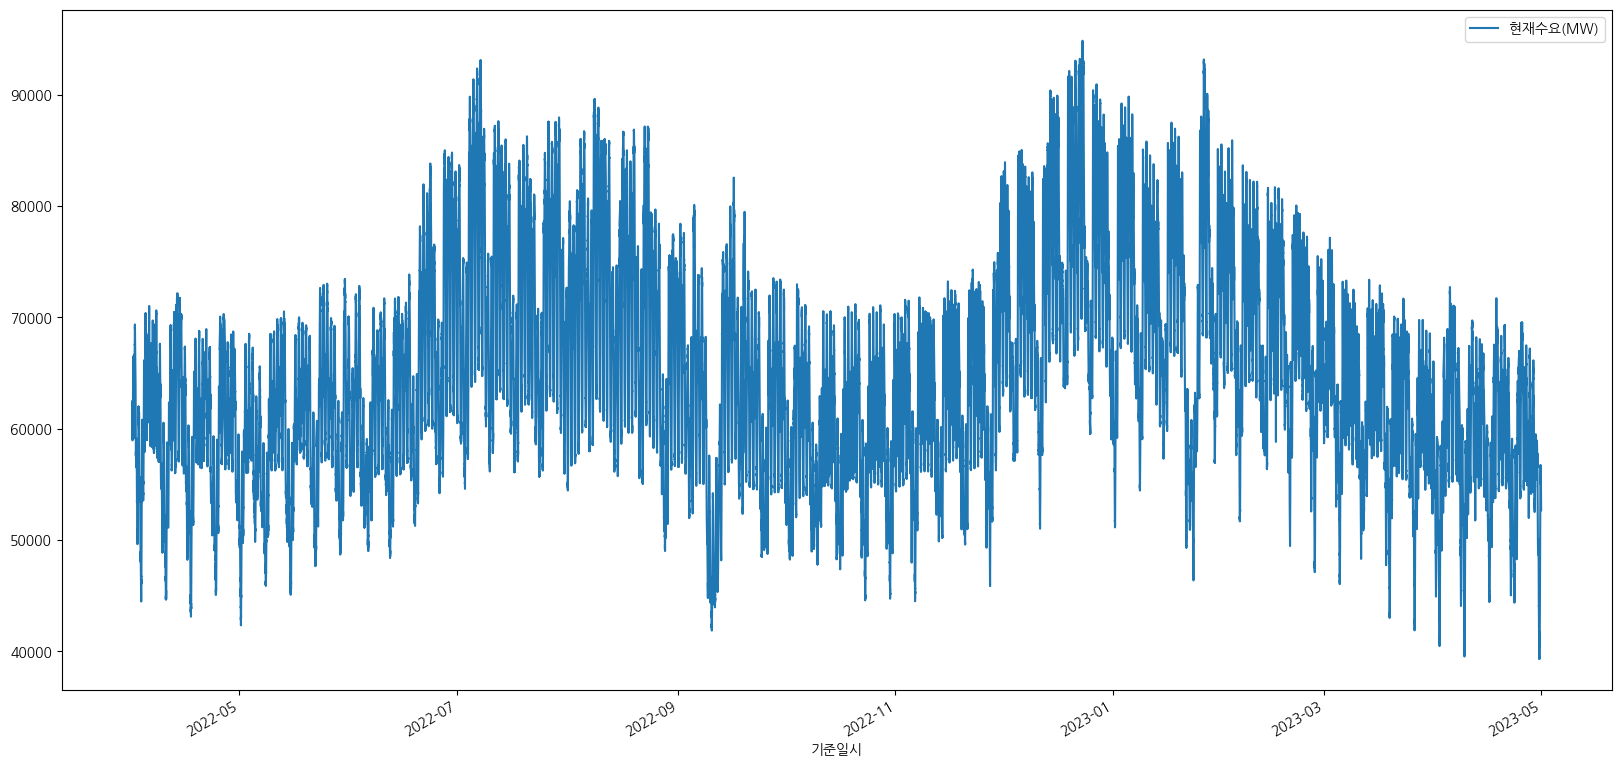

In [5]:
df[['현재수요(MW)']].plot(figsize =(20,10));

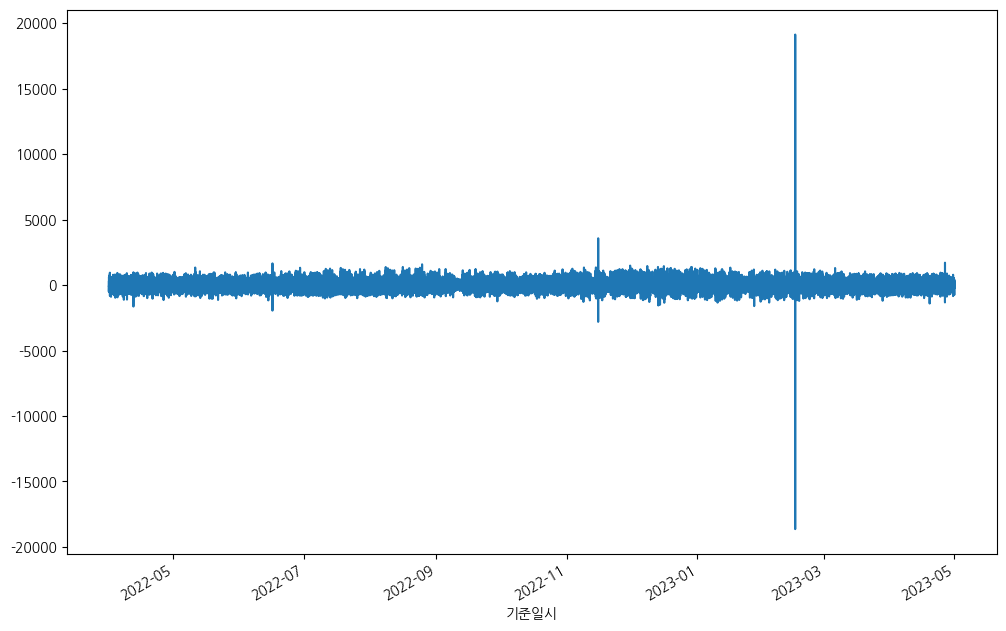

In [6]:
from statsmodels.tsa.statespace.tools import diff
diff(df["현재수요(MW)"], k_diff=1).plot(figsize=(12,8));

# Target data 추출

## train 데이터 추출

In [4]:
# train기간
train = df.loc[:'2023-03-12 23:55:00']

In [5]:
train.to_csv("train.csv")

In [9]:
train

,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
기준일시,,,,,,,
2022-04-01 00:00:00,82494.25,62453.29,70100,20040.96,32.08951,9257.45,14.82300
2022-04-01 00:05:00,83807.25,62329.25,70700,21477.99,34.45893,10889.28,17.47058
2022-04-01 00:10:00,83799.12,61830.96,70700,21968.15,35.52937,10865.86,17.57350
2022-04-01 00:15:00,83790.42,61648.72,70700,22141.69,35.91589,10864.26,17.62284
2022-04-01 00:20:00,83770.82,61382.62,70700,22388.19,36.47318,10451.95,17.02754
...,...,...,...,...,...,...,...
2023-03-12 23:35:00,84905.65,60235.18,61500,24670.47,40.95692,10984.33,18.23575
2023-03-12 23:40:00,84900.67,60106.61,61500,24794.05,41.25012,10952.83,18.22233
2023-03-12 23:45:00,84895.06,59725.49,61500,25169.56,42.14208,11450.91,19.17256


In [6]:
X_train = train.drop("현재수요(MW)", axis=1)
X_train.to_csv("X_train.csv")
y_train = train['현재수요(MW)']
y_train.to_csv("y_train.csv")


In [7]:
X_train.shape, y_train.shape

((99545, 6), (99545,))

## test 데이터 추출

In [8]:
# test기간
test = df.loc['2023-03-13 00:00:00':'2023-03-19 23:55:00']
test.to_csv("test.csv")

In [9]:
test

,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
기준일시,,,,,,,
2023-03-13 00:00:00,84908.51,58782.03,72459,26126.48,44.44637,11493.20,19.55223
2023-03-13 00:05:00,85917.51,58954.44,72459,26963.07,45.73543,11608.36,19.69040
2023-03-13 00:10:00,86266.17,58710.58,72459,27555.59,46.93462,11721.43,19.96476
2023-03-13 00:15:00,86280.27,58298.44,72459,27981.82,47.99755,11486.17,19.70237
2023-03-13 00:20:00,86249.03,58263.70,72459,27985.33,48.03218,11020.61,18.91506
...,...,...,...,...,...,...,...
2023-03-19 23:35:00,83627.65,58627.16,60700,25000.48,42.64317,10477.01,17.87057
2023-03-19 23:40:00,83621.96,57941.24,60700,25680.72,44.32200,10712.65,18.48882
2023-03-19 23:45:00,83618.93,57726.21,60700,25892.72,44.85435,10759.25,18.63841


In [10]:
X_test = test.drop("현재수요(MW)", axis=1)
X_test.to_csv("X_test.csv")

In [11]:
y = test['현재수요(MW)']
y.to_csv("y.csv")


In [12]:
X_test.shape, y.shape

((2016, 6), (2016,))

## train, test 분포 비교

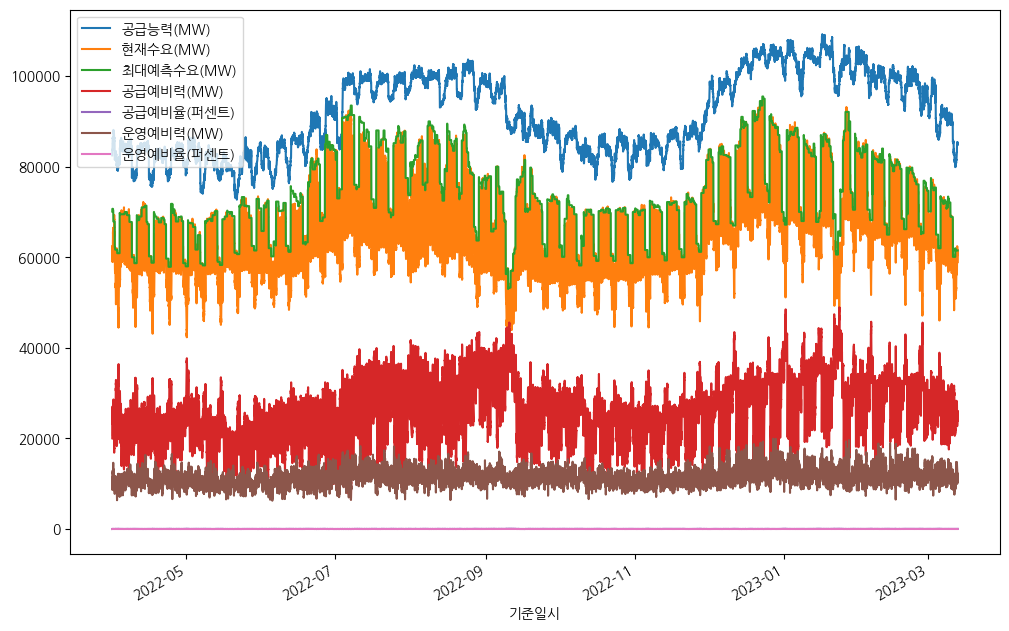

In [16]:
train.plot(figsize = (12,8));

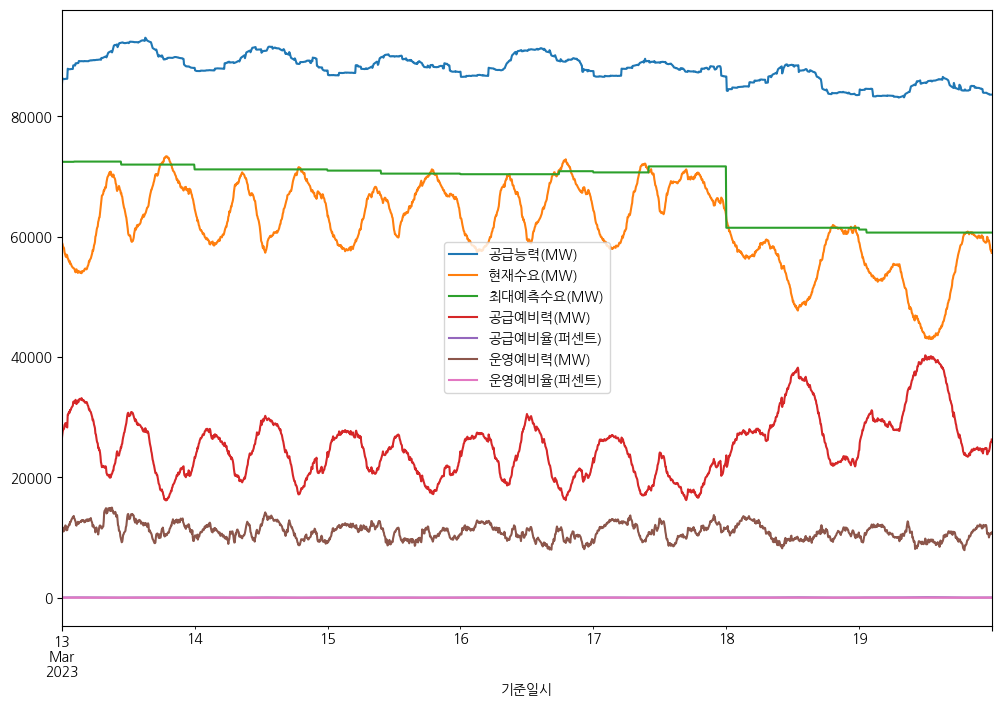

In [17]:
test.plot(figsize = (12,8));

# Ensemble

## RandomForest

In [5]:
# 기상데이터 import
df_final = pd.read_csv("meteorological/df_final.csv", index_col=0, parse_dates=True) # 기상데이터 total 최종본
df_final.index.freq = '5T'
train = pd.read_csv("meteorological/train.csv", index_col=0, parse_dates=True) # 2022-04-01 00:00:00 ~ 2023-03-12 23:55:00 까지의 데이터
train.index.freq = '5T'
X_train = pd.read_csv("meteorological/X_train.csv", index_col=0, parse_dates=True)
X_train.index.freq='5T'
y_train = pd.read_csv("meteorological/y_train.csv", index_col=0, parse_dates=True)
y_train.index.freq='5T'
# test = pd.read_csv("meteorological/test.csv", index_col=0, parse_dates=True) # 2023-03-13 00:00:00':'2023-03-19 23:55:00' 까지의 데이터
# test.index.freq = '5T'
X_test = pd.read_csv("meteorological/X_test.csv", index_col=0, parse_dates=True)
X_test.index.freq = '5T'
y = pd.read_csv("meteorological/y.csv", index_col=0, parse_dates=True)
y.index.freq = '5T'

In [11]:
X_train

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리)
2022-04-01 00:00:00,3.350549,6.443956,81.538462,-6.900000,-9.0,6.416484,1.884615,1017.737363,2284.109890
2022-04-01 00:05:00,3.329212,6.403297,81.642949,-6.999634,-9.0,6.375275,1.877564,1017.764469,2286.772894
2022-04-01 00:10:00,3.307875,6.362637,81.747436,-7.099267,-9.0,6.334066,1.870513,1017.791575,2289.435897
2022-04-01 00:15:00,3.286538,6.321978,81.851923,-7.198901,-9.0,6.292857,1.863462,1017.818681,2292.098901
2022-04-01 00:20:00,3.265201,6.281319,81.956410,-7.298535,-9.0,6.251648,1.856410,1017.845788,2294.761905
...,...,...,...,...,...,...,...,...,...
2023-03-12 23:35:00,-8.620109,1.985236,45.796196,-8.577083,-9.0,1.198822,5.067663,1013.323188,3841.677536
2023-03-12 23:40:00,-8.701087,1.941667,45.652174,-8.516667,-9.0,1.157971,5.054348,1013.334420,3849.757246
2023-03-12 23:45:00,-8.782065,1.898098,45.508152,-8.456250,-9.0,1.117120,5.041033,1013.345652,3857.836957
2023-03-12 23:50:00,-8.863043,1.854529,45.364130,-8.395833,-9.0,1.076268,5.027717,1013.356884,3865.916667


In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split

In [27]:
def get_score_splited_train(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest,ytest)
    pred = model.predict(xtest)
    C = mape(ytest, pred)

    print(f"ACC train : {A:.4f}, test : {B:.4f}, mape : {C:.4f}" )

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, shuffle=False)

In [34]:
# rf_model = RandomForestRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=None, min_samples_leaf=1,
                                    min_samples_split=2, n_estimators=200)
rf_model.fit(xtrain,ytrain)

C:\Users\ppjjh\anaconda3\envs\torch2\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=200, random_state=42)

In [35]:
get_score_splited_train(rf_model, xtrain, xtest, ytrain, ytest)

ACC train : 0.9991, test : 0.0749, mape : 0.1004


In [36]:
vanilla_rf = rf_model.predict(X_test)

In [37]:
mape(y, vanilla_rf)

0.10329289256807637

In [38]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = xtrain.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


          importance
기온          0.288293
이슬점온도       0.200334
지면온도        0.114187
기압          0.100749
일조량         0.088999
시정(가시거리)    0.063805
풍속          0.056065
강수량         0.045710
상대습도        0.041860


- 그러나 모든 지표가 후행성 지표이므로 분석 대상의 Feature가 아니기에 해당 결과를 신뢰할 수 없음.

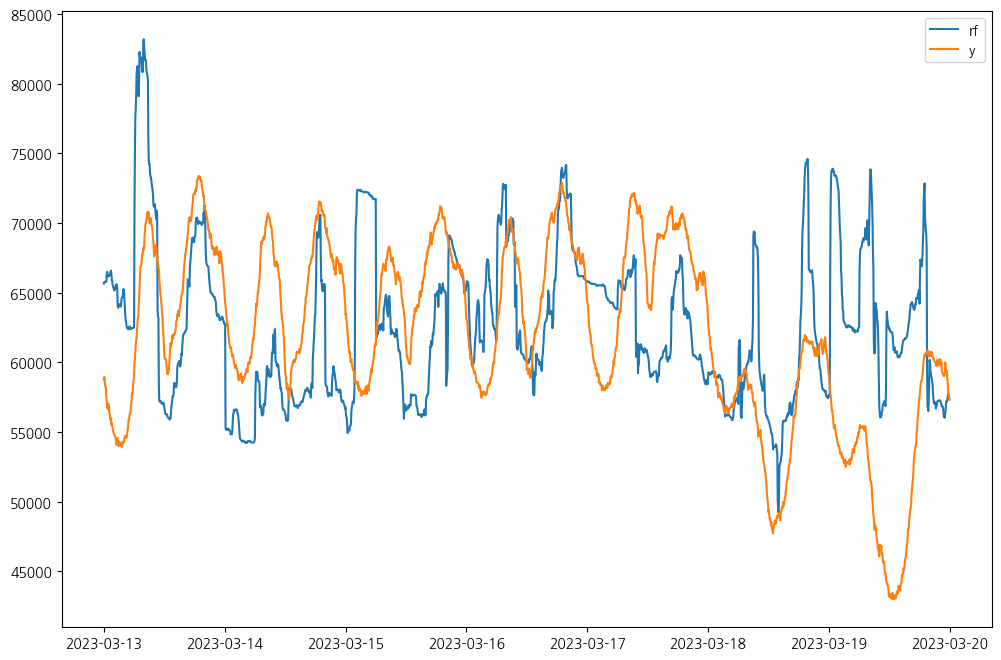

In [39]:
prediction = pd.Series(vanilla_rf)
prediction.index = y.index
prediction
plt.figure(figsize=(12,8))
plt.plot(prediction, label = 'rf')
plt.plot(y, label = 'y')
# plt.xlabel(y.index)
plt.legend()
plt.show()

## Time Series 변수 삽입

In [7]:
# Time Series 분석에 따른 target time 변수
target_time = [25,68,156,288,576]

In [10]:
X_train

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리)
2022-04-01 00:00:00,3.350549,6.443956,81.538462,-6.900000,-9.0,6.416484,1.884615,1017.737363,2284.109890
2022-04-01 00:05:00,3.329212,6.403297,81.642949,-6.999634,-9.0,6.375275,1.877564,1017.764469,2286.772894
2022-04-01 00:10:00,3.307875,6.362637,81.747436,-7.099267,-9.0,6.334066,1.870513,1017.791575,2289.435897
2022-04-01 00:15:00,3.286538,6.321978,81.851923,-7.198901,-9.0,6.292857,1.863462,1017.818681,2292.098901
2022-04-01 00:20:00,3.265201,6.281319,81.956410,-7.298535,-9.0,6.251648,1.856410,1017.845788,2294.761905
...,...,...,...,...,...,...,...,...,...
2023-03-12 23:35:00,-8.620109,1.985236,45.796196,-8.577083,-9.0,1.198822,5.067663,1013.323188,3841.677536
2023-03-12 23:40:00,-8.701087,1.941667,45.652174,-8.516667,-9.0,1.157971,5.054348,1013.334420,3849.757246
2023-03-12 23:45:00,-8.782065,1.898098,45.508152,-8.456250,-9.0,1.117120,5.041033,1013.345652,3857.836957
2023-03-12 23:50:00,-8.863043,1.854529,45.364130,-8.395833,-9.0,1.076268,5.027717,1013.356884,3865.916667


In [8]:
target_list = list(X_train.columns)
target_list

['이슬점온도', '기온', '상대습도', '강수량', '일조량', '지면온도', '풍속', '기압', '시정(가시거리)']

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
TES_X_train = X_train.copy()
TES_X_test = X_test.copy()

In [13]:
# 0 값의 오류로 인한 로그변환
for col in target_list:
    TES_X_train[col] = scaler.fit_transform(TES_X_train[[col]])
    TES_X_test[col] = scaler.fit_transform(TES_X_test[[col]])

In [14]:
TES_X_train.head()

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리)
2022-04-01 00:00:00,0.532656,0.446062,0.787763,0.098366,0.0,0.234426,0.254189,0.778943,0.494186
2022-04-01 00:05:00,0.532208,0.445197,0.789166,0.093699,0.0,0.233747,0.252967,0.779529,0.494890
2022-04-01 00:10:00,0.531761,0.444332,0.790568,0.089032,0.0,0.233067,0.251745,0.780115,0.495595
2022-04-01 00:15:00,0.531314,0.443467,0.791971,0.084365,0.0,0.232388,0.250524,0.780700,0.496299
2022-04-01 00:20:00,0.530867,0.442602,0.793374,0.079698,0.0,0.231708,0.249302,0.781286,0.497004


In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tqdm import tqdm
def make_TES_se_add(target_time, col, TES_X_train, TES_X_test):
    for i in tqdm(target_time):
        model_add = ExponentialSmoothing(TES_X_train[col], trend='add', seasonal='add', seasonal_periods=i).fit()
        TES_X_train[f'TESadd_add{i}{col}'] = model_add.fittedvalues
        model_add = ExponentialSmoothing(TES_X_test[col], trend='add', seasonal='add', seasonal_periods=i).fit()
        TES_X_test[f'TESadd_add{i}{col}'] = model_add.fittedvalues

#
#     for i in tqdm(target_time):
#         model_add = ExponentialSmoothing(TES_X_train[col], trend='mul', seasonal='add', seasonal_periods=i).fit()
#         TES_X_train[f'TESmul_add{i}{col}'] = model_add.fittedvalues
#         model_add = ExponentialSmoothing(TES_X_test[col], trend='mul', seasonal='add', seasonal_periods=i).fit()
#         TES_X_test[f'TESmul_add{i}{col}'] = model_add.fittedvalues
    return TES_X_train, TES_X_test
#
# # TES_X_train.tail()

In [16]:
for col in target_list:
    TES_X_train, TES_X_test = make_TES_se_add(target_time, col, TES_X_train, TES_X_test)

 40%|████      | 2/5 [00:19<00:29,  9.77s/it]C:\Users\ppjjh\anaconda3\envs\torch2\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
 60%|██████    | 3/5 [00:41<00:30, 15.37s/it]C:\Users\ppjjh\anaconda3\envs\torch2\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
 80%|████████  | 4/5 [01:14<00:22, 22.49s/it]C:\Users\ppjjh\anaconda3\envs\torch2\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
 40%|████      | 2/5 [00:22<00:34, 11.39s/it]C:\Users\ppjjh\anaconda3\envs\torch2\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
 60%|██████    | 3/5 [00:44<00:33, 16.53s/it]C:\Users\ppjjh\anaconda3\envs\t

In [17]:
TES_X_train.tail()

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리),TESadd_add25이슬점온도,...,TESadd_add25기압,TESadd_add68기압,TESadd_add156기압,TESadd_add288기압,TESadd_add576기압,TESadd_add25시정(가시거리),TESadd_add68시정(가시거리),TESadd_add156시정(가시거리),TESadd_add288시정(가시거리),TESadd_add576시정(가시거리)
2023-03-12 23:35:00,0.281735,0.351204,0.307931,0.01981,0.0,0.148395,0.805707,0.683590,0.906215,0.281744,...,0.683562,0.683591,0.683566,0.683616,0.683596,0.906160,0.906321,0.906047,0.906234,0.906239
2023-03-12 23:40:00,0.280038,0.350277,0.305997,0.02264,0.0,0.147721,0.803400,0.683832,0.908352,0.280038,...,0.683830,0.683850,0.683815,0.683853,0.683846,0.908424,0.908458,0.908081,0.908376,0.908375
2023-03-12 23:45:00,0.278341,0.349351,0.304064,0.02547,0.0,0.147048,0.801093,0.684075,0.910489,0.278334,...,0.684092,0.684097,0.684041,0.684073,0.684095,0.910603,0.910625,0.910179,0.910511,0.910504
2023-03-12 23:50:00,0.276643,0.348424,0.302130,0.02830,0.0,0.146374,0.798786,0.684318,0.912627,0.276641,...,0.684330,0.684342,0.684305,0.684289,0.684336,0.912638,0.912724,0.912356,0.912639,0.912626
2023-03-12 23:55:00,0.274946,0.347497,0.300197,0.03113,0.0,0.145701,0.796479,0.684560,0.914764,0.274939,...,0.684563,0.684580,0.684562,0.684509,0.684569,0.914721,0.914842,0.914566,0.914772,0.914752


In [19]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 기준값 설정 (보통 VIF > 10은 다중공선성이 심하다고 판단)
VIF_THRESHOLD = 10

# 복사본 생성
X = TES_X_train.copy()

# 반복적으로 VIF 계산 및 제거
dropped_features = []

while True:
    # 상수항 추가 (intercept), VIF 계산을 위해 필요
    X_with_const = add_constant(X)
    
    # VIF 계산
    vif = pd.DataFrame()
    vif["feature"] = X_with_const.columns
    vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

    # 상수항 제외하고 최대 VIF 가진 항목 찾기
    vif_no_const = vif[vif["feature"] != "const"]
    max_vif = vif_no_const["VIF"].max()
    max_feature = vif_no_const.loc[vif_no_const["VIF"].idxmax(), "feature"]

    # 기준 이상이면 제거
    if max_vif > VIF_THRESHOLD:
        print(f"제거된 변수: {max_feature} (VIF={max_vif:.2f})")
        X.drop(columns=[max_feature], inplace=True)
        dropped_features.append(max_feature)
    else:
        break

# 최종 변수 리스트 출력
print("\n최종 선택된 변수 목록:")
print(list(X.columns))

# TES_X_train에 다시 저장
TES_X_train = X


제거된 변수: TESadd_add25일조량 (VIF=270841127.72)
제거된 변수: TESadd_add25이슬점온도 (VIF=88035552.39)
제거된 변수: TESadd_add576이슬점온도 (VIF=51616212.17)
제거된 변수: TESadd_add68기온 (VIF=36161662.63)
제거된 변수: TESadd_add288지면온도 (VIF=29148044.94)
제거된 변수: TESadd_add68기압 (VIF=27959389.00)
제거된 변수: TESadd_add156이슬점온도 (VIF=25978501.14)
제거된 변수: TESadd_add25기온 (VIF=19532586.03)
제거된 변수: TESadd_add25지면온도 (VIF=16796045.95)
제거된 변수: TESadd_add576기온 (VIF=15794271.41)
제거된 변수: TESadd_add288시정(가시거리) (VIF=11015430.24)
제거된 변수: TESadd_add68풍속 (VIF=10879279.73)
제거된 변수: TESadd_add576기압 (VIF=10492765.84)
제거된 변수: TESadd_add156기온 (VIF=10342300.37)
제거된 변수: TESadd_add288이슬점온도 (VIF=9277743.97)
제거된 변수: TESadd_add25상대습도 (VIF=8792651.74)
제거된 변수: TESadd_add576상대습도 (VIF=8506015.42)
제거된 변수: TESadd_add156기압 (VIF=6851255.87)
제거된 변수: TESadd_add68시정(가시거리) (VIF=4445238.64)
제거된 변수: 기온 (VIF=4005400.12)
제거된 변수: TESadd_add68지면온도 (VIF=2807912.48)
제거된 변수: TESadd_add25기압 (VIF=2756240.33)
제거된 변수: 이슬점온도 (VIF=2383505.74)
제거된 변수: TESadd_add576풍속 (VIF=2380356.71)


In [20]:
TES_X_test.tail()

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리),TESadd_add25이슬점온도,...,TESadd_add25기압,TESadd_add68기압,TESadd_add156기압,TESadd_add288기압,TESadd_add576기압,TESadd_add25시정(가시거리),TESadd_add68시정(가시거리),TESadd_add156시정(가시거리),TESadd_add288시정(가시거리),TESadd_add576시정(가시거리)
2023-03-19 23:35:00,0.628224,0.305605,0.785088,0.0,0.0,0.172388,0.000789,0.154943,0.006747,0.628308,...,0.154706,0.155024,0.154962,0.155022,0.154982,0.007024,0.006861,0.006505,0.006990,0.006711
2023-03-19 23:40:00,0.627517,0.301515,0.789557,0.0,0.0,0.170638,0.000592,0.153659,0.005060,0.627430,...,0.153583,0.153745,0.153658,0.153746,0.153526,0.005397,0.005176,0.004856,0.005301,0.004996
2023-03-19 23:45:00,0.626809,0.297424,0.794025,0.0,0.0,0.168888,0.000395,0.152375,0.003373,0.626702,...,0.152364,0.152345,0.152365,0.152441,0.152275,0.003324,0.003443,0.003195,0.003617,0.003312
2023-03-19 23:50:00,0.626101,0.293333,0.798493,0.0,0.0,0.167138,0.000197,0.151090,0.001687,0.625895,...,0.151086,0.151088,0.151098,0.151131,0.151058,0.001478,0.001656,0.001562,0.001995,0.001650
2023-03-19 23:55:00,0.625393,0.289243,0.802961,0.0,0.0,0.165388,0.000000,0.149806,0.000000,0.625212,...,0.149765,0.149837,0.149837,0.149830,0.149757,0.000166,-0.000006,-0.000047,0.000243,-0.000042


In [21]:
TES_X_test = TES_X_test[TES_X_train.columns]


In [22]:
TES_X_test.tail()

,시정(가시거리),TESadd_add156상대습도,TESadd_add156강수량,TESadd_add68일조량,TESadd_add156지면온도,TESadd_add288풍속,TESadd_add288기압
2023-03-19 23:35:00,0.006747,0.785223,-0.000104,-0.000025,0.172212,0.001158,0.155022
2023-03-19 23:40:00,0.005060,0.789669,-0.000052,-0.000027,0.170449,0.001026,0.153746
2023-03-19 23:45:00,0.003373,0.794148,-0.000408,-0.002525,0.168710,0.000910,0.152441
2023-03-19 23:50:00,0.001687,0.798636,-0.000577,-0.000015,0.166969,0.000747,0.151131
2023-03-19 23:55:00,0.000000,0.803058,-0.000439,-0.000010,0.165164,0.000591,0.149830


In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(TES_X_train, y_train, shuffle=False)

In [24]:
# rf_model = RandomForestRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=None, min_samples_leaf=1,
                                    min_samples_split=2, n_estimators=200)
rf_model.fit(xtrain,ytrain)

C:\Users\ppjjh\anaconda3\envs\torch2\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=200, random_state=42)

In [28]:
get_score_splited_train(rf_model, xtrain, xtest, ytrain, ytest)

ACC train : 0.9983, test : 0.0570, mape : 0.1008


In [29]:
vanilla_rf = rf_model.predict(TES_X_test)

In [30]:
mape(y, vanilla_rf)

0.12516301326309265

In [31]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = xtrain.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                   importance
TESadd_add156지면온도    0.275927
TESadd_add156상대습도    0.219649
TESadd_add288기압      0.161694
TESadd_add68일조량      0.113521
시정(가시거리)             0.084997
TESadd_add288풍속      0.084746
TESadd_add156강수량     0.059465


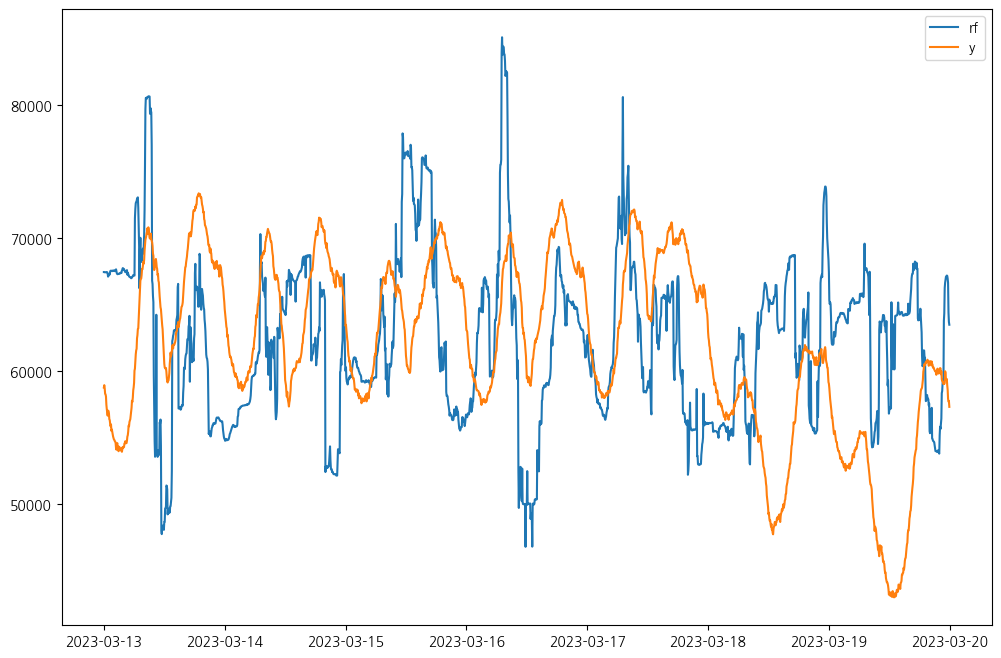

In [32]:
prediction = pd.Series(vanilla_rf)
prediction.index = y.index
prediction
plt.figure(figsize=(12,8))
plt.plot(prediction, label = 'rf')
plt.plot(y, label = 'y')
# plt.xlabel(y.index)
plt.legend()
plt.show()